# Generation of the distance matrice and its euclidean space transformation

This is the first part of the pipeline, where the data is preprocessed, distance matrice is generated and transformed into a coordinate matrice with a help of an MDS procedure, implemented in R. 

The data preprocessing includes labels (Y) and features (X) generation in a form of 1d and 2d numpy arrays respectively.

The distance matrice is obtained from the performances of each of the feature subsets on the cross-validation data set. The intrasubset distances are obtained based on the feature_importance parameter of Decision Tree classifier, sklearn implementation.  

# Importing all the necessary modules

In [1]:
import pandas as pd
import os
import sys
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import PconvNetPolimi as pcnp
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20.0, 40.0)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['xtick.labelsize'] = 22
matplotlib.rcParams['ytick.labelsize'] = 22
matplotlib.rcParams['axes.labelsize'] = 30
matplotlib.rcParams['axes.titlesize'] = 30

%load_ext autoreload
%autoreload 2

## Making the results reproducible

In [3]:
seed = 42
np.random.seed(seed)

# rpy2 module allows on usage of R inside of python

In [5]:
import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
sma = importr('smacof')

# Initialization of all the required parameters

In [ ]:
num_iters = 20 #number of iterations for finding the most optimal subset of features. 
#the subset is then subtracted from the list of available features and the operation is repeated 
population_subset_size = 100 #number of features to be chosen
num_of_top_to_choose = 1
top_k = 500 # feature selectrion procedure, where top k features based on chi2 test are taken
#tads = True #set to True if you want to work with tads set of genes

In [ ]:
path = "/home/nanni/Projects/ML/TAD_Trento/all_tcga_TAD.tsv"
X_train, X_test, Y_train, Y_test, top_inds = pcnp.get_raw_data(path, top_k, tads=False)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train,Y_train,test_size=0.3)


# Data tissue-invariant genes

# Getting the MDS representation of the distance matrix

In [34]:
scores, ranks, inds = pcnp.cluster_generator_new(X_train, Y_train, num_iters, population_subset_size, 
                                            top_k, 5,num_of_top_to_choose)
dist_final = pcnp.get_distance_matrix(scores, inds, ranks, X_train.shape[1])
R_mds = np.array(sma.torgerson(dist_final, p = 25))    


/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

# Loading multiple MDS matrices

In [124]:
# m_d_m = np.zeros((X_train.shape[1],25,10),float)
# for i in range(0,10):
#     m_d_m[:,:,i] = np.load('dist_m_100_iter_'+str(i+2)+'.npy')
# # for i in range(10,20):
# #     m_d_m[:,:,i] = np.load('dist_m_200_iter_'+str(i+2-10)+'.npy')

## Obtaining subsets and their scores, building a distance matrice on its basis, applying MDS, checking the preservation of the nearest neighbors

In [65]:
#scores, ranks, inds = cluster_generator_wrapper_subsets(X_train, Y_train, num_iters, subset_size, top_k)

/home/sakalouski/.conda/envs/artur/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
#dist_final = get_distance_matrix(scores, inds, ranks, X_train.shape[1])
#R_mds = np.array(sma.torgerson(dist_final, p = 25))

In [41]:
preservation = pcnp.check_preservation_of_dims(R_mds.T, dist_final, 5)
#subset_size is number of nearest neighbors
print(preservation)

Computing distances in MDSres
Finding nearest neighbors
0.81


## Getting the disntaces from the TADs distance matrix for top_k genes 

In [48]:
# path_MDS = '/home/sakalouski/TAD_Trento/distance matrices/MDSes/interTADs_dists_all_15k.csv'
# R_mds = pd.read_csv(path_MDS, header = None).as_matrix()

In [56]:
# R_mds_selected = R_mds[top_inds,:]

# Second part of the pipeline - DL setup

## Imports 

In [7]:
from keras import backend as K
import tensorflow as tf
config = tf.ConfigProto(device_count = {'CPU': 1}, intra_op_parallelism_threads=7, inter_op_parallelism_threads=1)
session = tf.Session(config=config)
K.set_session(session)
import keras

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from phcnn.layers import PhyloConv1D, euclidean_distances

Using TensorFlow backend.


In [36]:
batch_size = 100
nb_filters = 5
nb_neighbors = 5
model_name = 'test_pub_data'

# Load the coordinates matrice in case of using an external one

In [17]:
#R_mds = np.load('test.npy')

## Reshaping MDS represenation

In [37]:
MDSmat = pcnp.mds_reshape(R_mds, batch_size)

# Reshaping multiple MDS matrices

In [38]:
MDSmat.shape

(100, 25, 336, 1)

In [125]:
MDSmat_multi = np.zeros((int(batch_size),25,top_k,10),float)
for i in range(0,10):
    MDSmat_multi[:,:,:,[i]] = pcnp.mds_reshape(m_d_m[:,:,i], int(batch_size))
#     temp = np.zeros_like(MDSmat_multi[:,:,:,[i]])
#     temp = MDSmat_multi[:,:,:,[i]]
#     temp.flatten()
#     np.random.shuffle(temp)
#     temp = temp.reshape(MDSmat_multi.shape[0],MDSmat_multi.shape[1],MDSmat_multi.shape[2],1)
#     MDSmat_multi[:,:,:,[i]] = temp

# Reshaping X and Y to the suitable form

In [39]:
Y_input_test = keras.utils.to_categorical(Y_test, num_classes=None)
Y_input_train = keras.utils.to_categorical(Y_train, num_classes=None)
Y_input_cv = keras.utils.to_categorical(Y_cv, num_classes=None)

X_test_inp = X_test.reshape(X_test.shape[0],X_test.shape[1],-1)
X_train_inp = X_train.reshape(X_train.shape[0],X_train.shape[1],-1)
X_cv_inp = X_cv.reshape(X_cv.shape[0],X_train.shape[1],-1)

In [40]:
Y_input_train.shape

(5569, 15)

# Upsampling

In [41]:
X_train_inp, Y_input_train = pcnp.upsampling(X_train_inp, Y_input_train)

# Creating and training the model. Validation loss is printed

In [43]:
model = pcnp.create_model(X_train_inp, Y_input_train, MDSmat, nb_filters, nb_neighbors, which = 'phylo')
#model = create_dense_model(X_train_inp, Y_input_train)

In [44]:
model_trained = pcnp.train_model(model, X_train_inp, Y_input_train, batch_size, 30, 30, model_name, 
                            MDSmat, X_cv_inp, Y_input_cv, dist_matrix=True)   

Epoch:  1
Current val_loss is:  3.197300707545604
Current train_loss is:  42.23400828047676
Model Saved as: test_pub_data
Epoch:  2
Current val_loss is:  3.2587975612921203
Current train_loss is:  38.261726573460145
Epoch:  3
Current val_loss is:  2.896791884123258
Current train_loss is:  37.3479758730232
Model Saved as: test_pub_data
Epoch:  4
Current val_loss is:  2.699976496450441
Current train_loss is:  36.375291643506955
Model Saved as: test_pub_data
Epoch:  5
Current val_loss is:  2.6390926511817137
Current train_loss is:  35.99009032112951
Model Saved as: test_pub_data
Epoch:  6
Current val_loss is:  2.634307134781441
Current train_loss is:  35.42646355306158
Model Saved as: test_pub_data
Epoch:  7
Current val_loss is:  2.6547172171738187
Current train_loss is:  35.13984458125785
Epoch:  8
Current val_loss is:  2.5731258948320757
Current train_loss is:  34.954178997721456
Model Saved as: test_pub_data
Epoch:  9
Current val_loss is:  2.5864049080521685
Current train_loss is:  34.

## Plotting validation and training loss functions

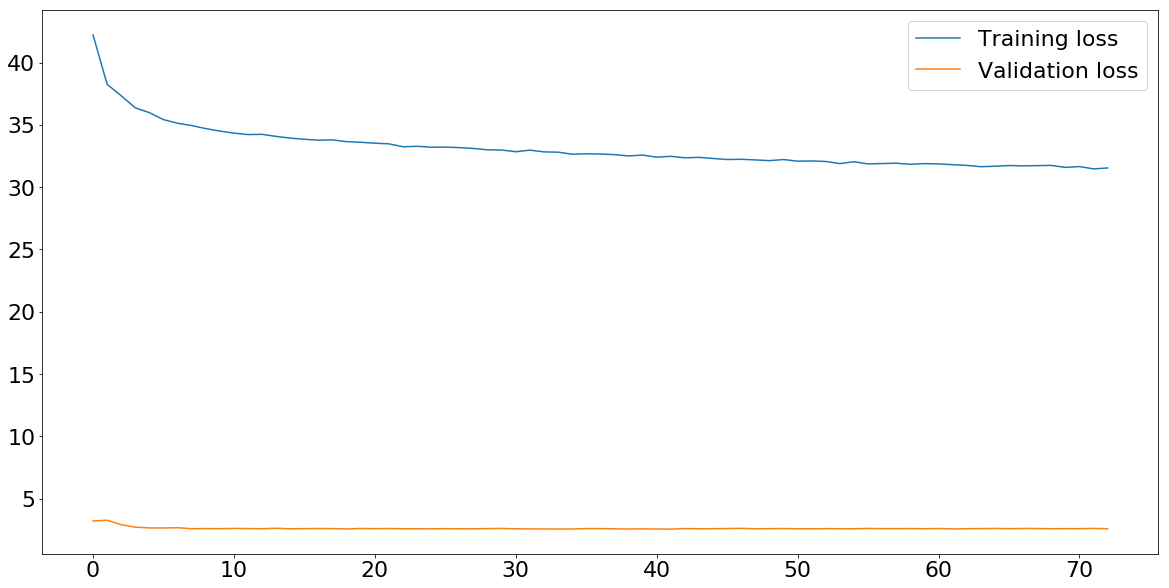

In [45]:
val_loss = np.load('val_loss_'+model_name+'.npy')
train_loss = np.load('train_loss_'+model_name+'.npy')
x_axis = range(0,len(val_loss))
plt.plot(x_axis,train_loss, label='Training loss')
plt.plot(x_axis,val_loss,  label='Validation loss')
plt.legend()
plt.show()

## Evaluating the performance on the test set

In [46]:
model_trained = pcnp.create_model(X_train_inp, Y_input_train, MDSmat, nb_filters, nb_neighbors, which = 'phylo')
model_trained.load_weights(model_name+'.h5')

In [48]:
Y_pred = np.array(Y_input_test)
for i in range(0,Y_pred.shape[0]):
    Y_pred[i,:] = model_trained.predict(x = [X_test_inp[[i],:,:], MDSmat[1:2:,:,:]])

Y_pred_1d = pcnp.to_1d_labels(Y_pred)
rep = classification_report(Y_test,Y_pred_1d)
print(rep)

             precision    recall  f1-score   support

          0       0.14      0.01      0.02       172
          1       0.17      0.18      0.18        92
          2       0.20      0.09      0.12        81
          3       0.11      0.05      0.07        81
          4       0.48      0.27      0.35        77
          5       0.00      0.00      0.00        66
          6       0.20      0.77      0.31       205
          7       0.20      0.04      0.07        46
          8       0.05      0.01      0.02        69
          9       0.00      0.00      0.00        36
         10       0.53      0.23      0.32        74
         11       0.61      0.27      0.37        75
         12       0.54      0.18      0.27        73
         13       0.00      0.00      0.00        16
         14       0.00      0.00      0.00        36

avg / total       0.23      0.22      0.17      1199

